In [134]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (mmingyeong@kasi.re.kr)
# @Date: 2023-12-07
# @Filename: work.ipynb
# work.

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

import pandas as pd

In [135]:
# Data Preparation

clusters_data_set1 = "./clusters.txt"

open_data_set1 = open(clusters_data_set1, "r")

df_data_set1 = pd.read_csv(clusters_data_set1, names=["data"], header=None)
#df_MCMC_data_set1 = pd.DataFrame(open_MCMC_data_set1)
# x position y value y error

In [136]:
data = df_data_set1["data"]

len(data)
print(data)

0      -0.810917
1       1.420924
2      -0.546520
3      -0.626595
4      -0.644230
          ...   
1870   -0.414415
1871    1.479028
1872   -0.728159
1873    1.568002
1874   -0.356697
Name: data, Length: 1875, dtype: float64


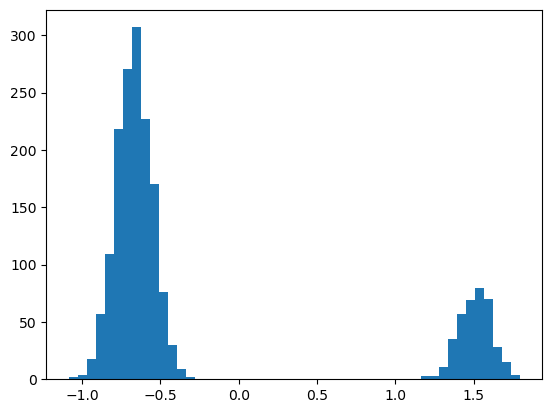

In [137]:
plt.figure()
plt.hist(data, bins=50)
plt.show()

In [138]:

num_of_init_clusters = 2
init_mean1 = -1
init_mean2 = 1

cluster1 = []
cluster2 = []
for point in data:
    dist1 = np.sqrt((point - init_mean1)**2)
    dist2 = np.sqrt((point - init_mean2)**2)
    
    if dist1 < dist2:
        cluster1.append(point)
    else:
        cluster2.append(point)

cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
up_mean1 = np.mean(cluster1)
up_mean2 = np.mean(cluster2)
init_var1 = np.var(cluster1)
init_var2 = np.var(cluster2)

cluster1 = []
cluster2 = []
for point in data:
    dist1 = np.sqrt((point - up_mean1)**2)
    dist2 = np.sqrt((point - up_mean2)**2)
    
    if dist1 < dist2:
        cluster1.append(point)
    else:
        cluster2.append(point)
        
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
up_mean1 = np.mean(cluster1)
up_mean2 = np.mean(cluster2)
up_var1 = np.var(cluster1)
up_var2 = np.var(cluster2)

print(init_mean1, init_mean2)
print(up_mean1, up_mean2)


-1 1
-0.6688620899530977 1.5095496535534263


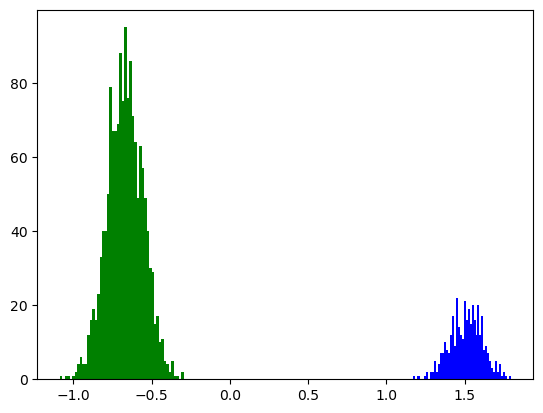

In [139]:
plt.figure()
plt.hist(cluster1, bins=50, color="g")
plt.hist(cluster2, bins=50, color="b")
plt.show()

In [140]:
# Data Preparation

clusters_data_set2 = "./two_d_cluster.txt"

open_data_set2 = open(clusters_data_set2, "r")
df_data_set2 = pd.read_csv(clusters_data_set2, names=["data1", "data2"], sep="\s+", header=None)

data1 = df_data_set2["data1"]
data2 = df_data_set2["data2"]
print(data1)

0       0.19
1       0.51
2       0.12
3       0.41
4       0.57
        ... 
2995    2.26
2996    2.09
2997    2.28
2998    2.10
2999    2.20
Name: data1, Length: 3000, dtype: float64


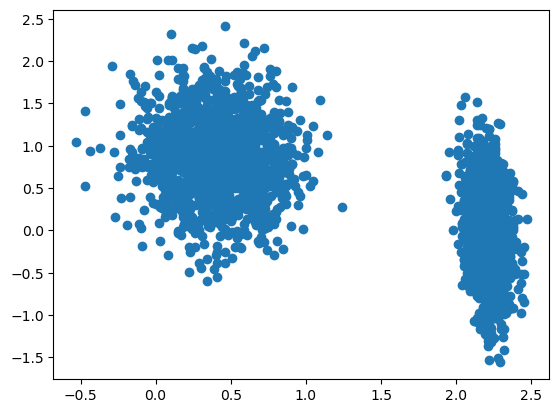

In [141]:
plt.figure()
plt.scatter(data1, data2)
plt.show()

In [142]:

num_of_init_clusters = 2
init_point11 = 0
init_point12 = 0
init_point21 = 2
init_point22 = 1

cluster1 = []
cluster2 = []

res1 = []
res2 = []
res3 = []
res4 = []
for i in range(len(data1)):
    dist1 = np.sqrt((data1[i] - init_point11)**2+(data2[i] - init_point12)**2)
    dist2 = np.sqrt((data1[i] - init_point21)**2+(data2[i] - init_point22)**2)
    
    if dist1 < dist2:
        res1.append(data1[i])
        res2.append(data2[i])
    else:
        res3.append(data1[i])
        res4.append(data2[i])

cluster1.append(res1)
cluster1.append(res2)
cluster2.append(res3)
cluster2.append(res4)

cluster1_res1 = np.array(cluster1[0])
cluster1_res2 = np.array(cluster1[1])
cluster2_res1 = np.array(cluster2[0])
cluster2_res2 = np.array(cluster2[1])
up_mean11, up_mean12 = np.mean(cluster1_res1), np.mean(cluster1_res2)
up_mean21, up_mean22 = np.mean(cluster2_res1), np.mean(cluster2_res2)
init_var11, init_var12 = np.var(cluster1_res1), np.var(cluster1_res2)
init_var21, init_var22 = np.var(cluster2_res1), np.var(cluster2_res2)

cluster1 = []
cluster2 = []

res1 = []
res2 = []
res3 = []
res4 = []
for i in range(len(data1)):
    dist1 = np.sqrt((data1[i] - up_mean11)**2+(data2[i] - up_mean12)**2)
    dist2 = np.sqrt((data1[i] - up_mean21)**2+(data2[i] - up_mean22)**2)
    
    if dist1 < dist2:
        res1.append(data1[i])
        res2.append(data2[i])
    else:
        res3.append(data1[i])
        res4.append(data2[i])

cluster1.append(res1)
cluster1.append(res2)
cluster2.append(res3)
cluster2.append(res4)
        
cluster1_res1 = np.array(cluster1[0])
cluster1_res2 = np.array(cluster1[1])
cluster2_res1 = np.array(cluster2[0])
cluster2_res2 = np.array(cluster2[1])
up_mean11, up_mean12 = np.mean(cluster1_res1), np.mean(cluster1_res2)
up_mean21, up_mean22 = np.mean(cluster2_res1), np.mean(cluster2_res2)
up_var11, up_var12 = np.var(cluster1_res1), np.var(cluster1_res2)
up_var21, up_var22 = np.var(cluster2_res1), np.var(cluster2_res2)

print("group1", init_point11, init_point12, "group2", init_point21, init_point22)
print("group1", up_mean11, up_mean12, "group2", up_mean21, up_mean22)


group1 0 0 group2 2 1
group1 0.39809873248832556 0.8670380253502336 group2 2.20962691538974 -0.015196535642904727


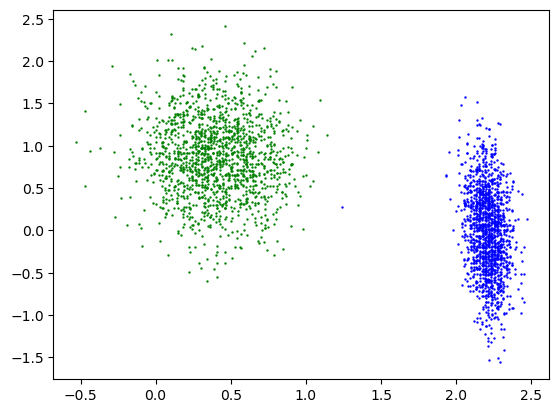

In [143]:
plt.figure()
plt.scatter(cluster1_res1, cluster1_res2, s=0.5, color="g")
plt.scatter(cluster2_res1, cluster2_res2, s=0.5, color="b")
plt.show()

In [144]:
# Data Preparation

arc_data_set2 = "./arc_cluster.txt"

open_data_arc = open(arc_data_set2, "r")
df_data_set3 = pd.read_csv(arc_data_set2, names=["data1", "data2"], sep="\s+", header=None)

data1 = df_data_set3["data1"]
data2 = df_data_set3["data2"]

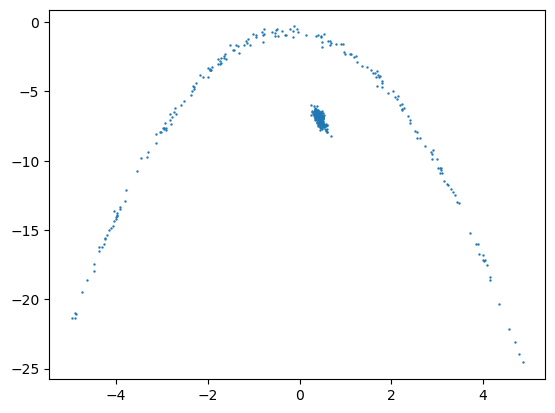

In [145]:
plt.figure()
plt.scatter(data1, data2, s=0.5)
plt.show()

In [180]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=30).fit(df_data_set3)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

1


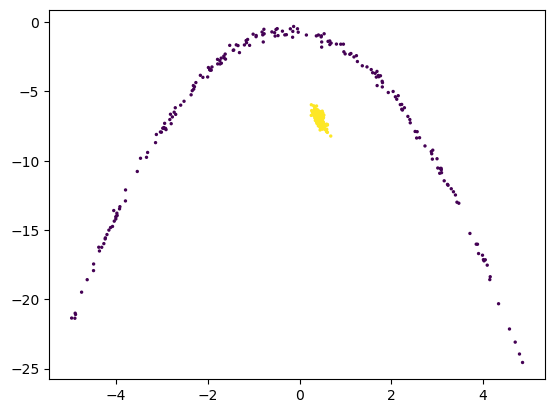

In [181]:
colour_index = np.array(labels)
plt.subplot(111)
x,y = data1, data2
plt.scatter(x,y,c=colour_index,s=2)
plt.show()